# Walkthrough

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
del df['Product_Category_2']
del df['Product_Category_3']

## Analyzing columns

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
df['User_ID'].nunique()

5891

In [8]:
df['Product_ID'].nunique()

3623

In [9]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Occupation'].nunique()

21

In [12]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [14]:
df['Marital_Status'].unique()

array([0, 1])

In [15]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [32]:
df['Purchase'].sum()/len(df['Purchase'])

np.float64(9333.859852635065)

In [7]:
for column in df.columns:
    print(column,":",df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


### Analyzing Gender

In [8]:
data = pd.DataFrame({"Ratio" :[len(df[df['Gender']=="M"]),len(df[df['Gender']=="F"])]},index=["Male","Female"])

In [9]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

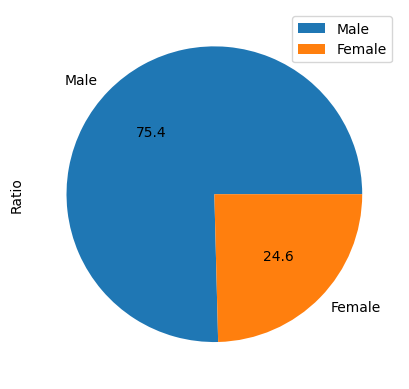

In [10]:
data.plot.pie(y="Ratio",autopct="%.1f")

<Axes: title={'center': 'Gender Ratio'}>

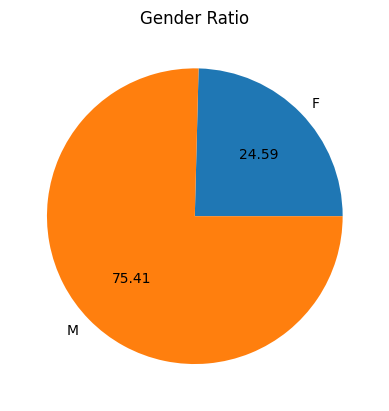

In [19]:
df.groupby("Gender").size().plot(kind="pie",autopct="%.2f",title="Gender Ratio")

<Axes: xlabel='Gender'>

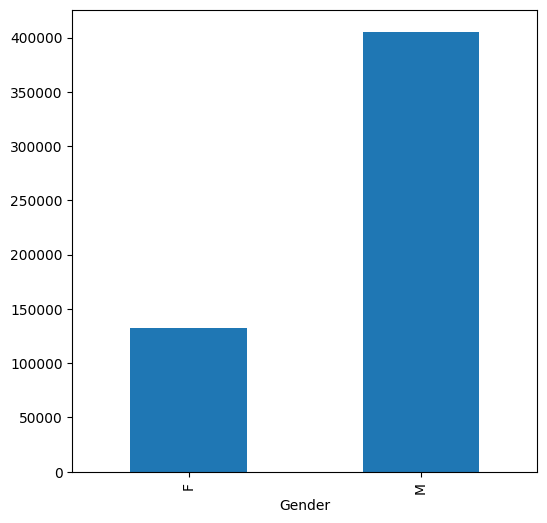

In [20]:
df.groupby("Gender").size().plot(kind="bar",figsize=(6,6))

In [6]:
grouped = df.groupby('Gender')
print("Grouping Done")

# Sum the Purchase
result = grouped['Purchase'].sum()
print("Summing Done")

# Print the result
print(result)

Grouping Done
Summing Done
Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64


<Axes: ylabel='Purchase'>

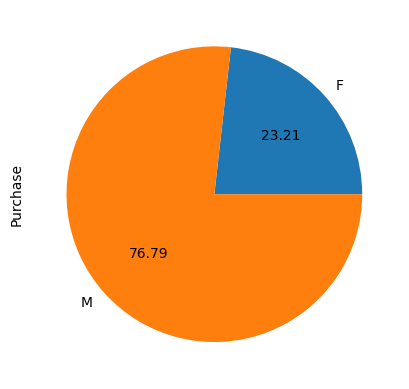

In [10]:
result.plot(kind="pie",autopct="%.2f")

<Axes: ylabel='Purchase'>

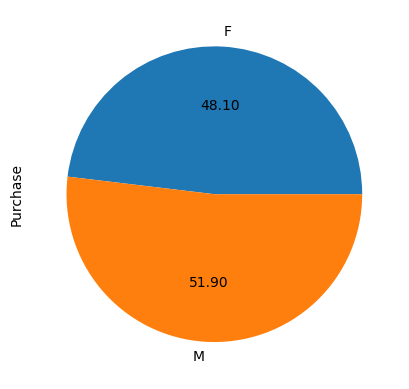

In [12]:
result2=grouped['Purchase'].mean()
result2.plot(kind="pie",autopct="%.2f")

## Analyzing age and marital status

<Axes: title={'center': 'Purchase Distribution by age'}, xlabel='Age'>

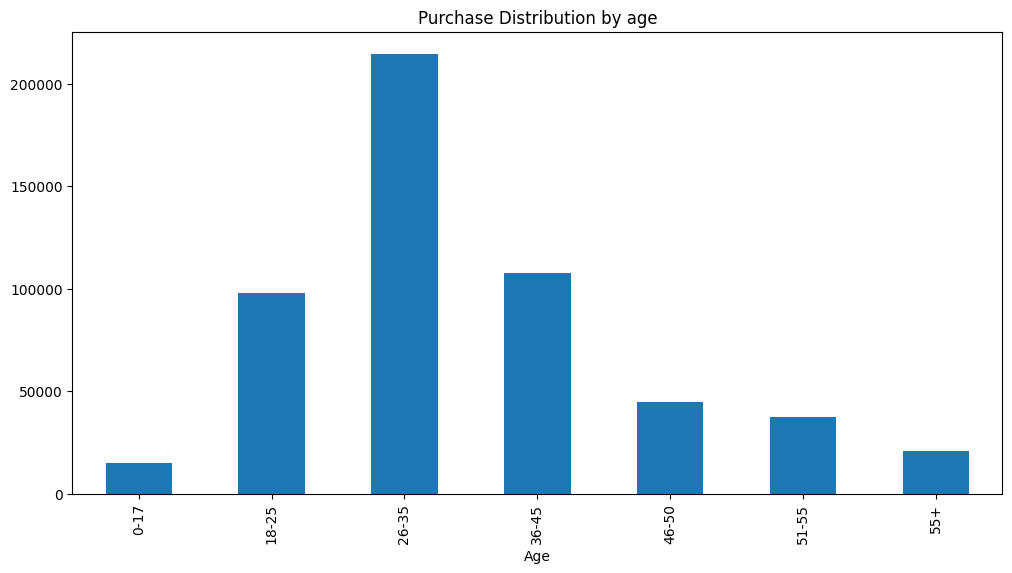

In [9]:
df.groupby('Age').size().plot(kind="bar",figsize=(12,6),title="Purchase Distribution by age")

In [11]:
lst=[]

for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
    
data1=pd.DataFrame(lst,columns=["Age","Products"])

In [12]:
data1

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: >

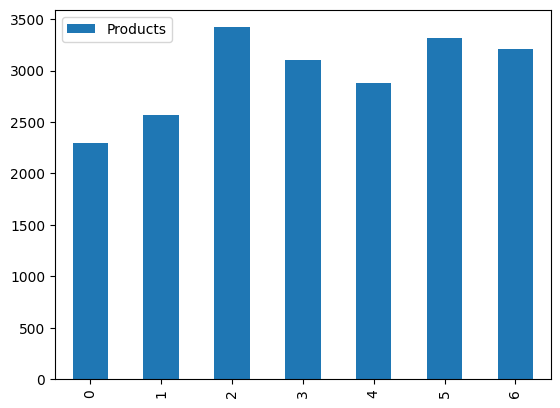

In [14]:
data1.plot(kind="bar")

<Axes: title={'center': 'Purchase Distribution by age'}, xlabel='Age'>

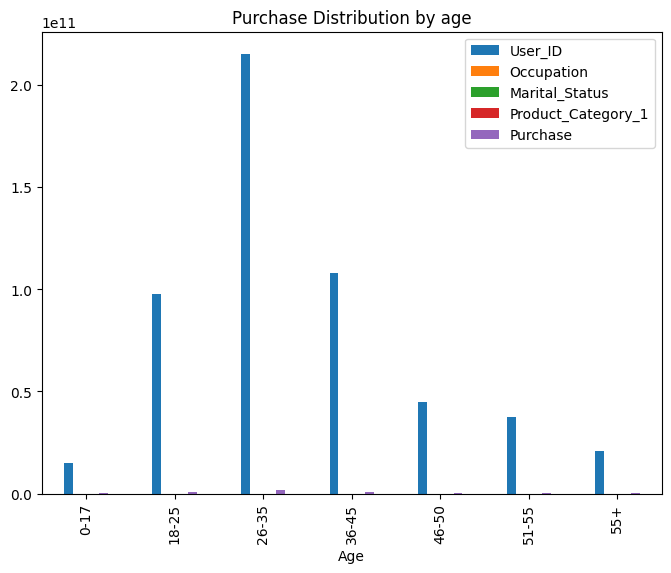

In [16]:
df.groupby('Age').sum().plot(kind="bar",figsize=(8,6),title="Purchase Distribution by age")

<Axes: >

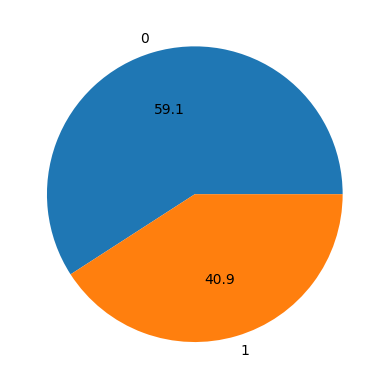

In [11]:
df.groupby('Marital_Status').size().plot(kind="pie",autopct="%0.1f")

## Occupation and Products Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

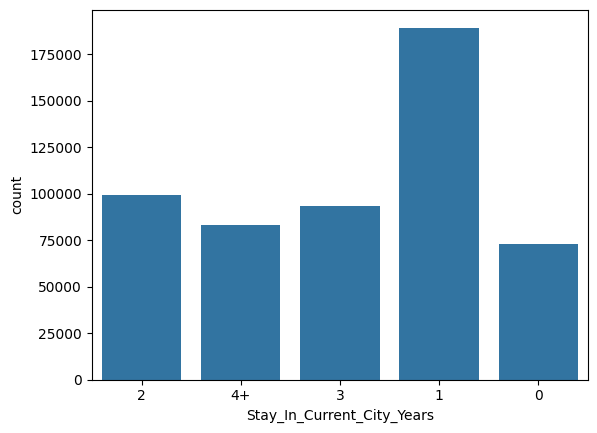

In [25]:
import seaborn as sns
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: >

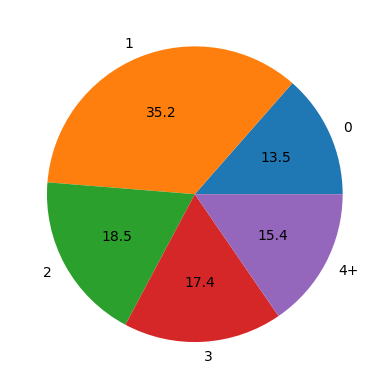

In [29]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct="%.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

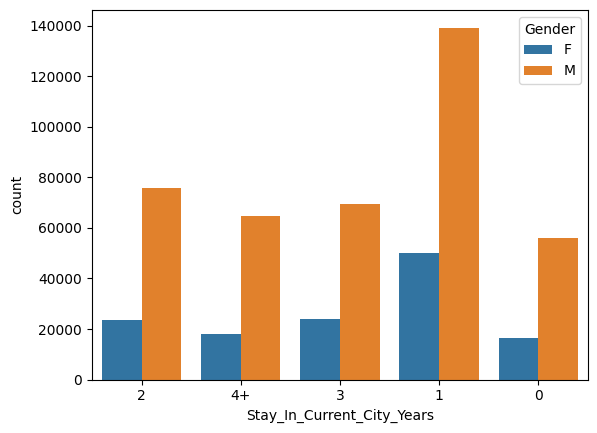

In [26]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

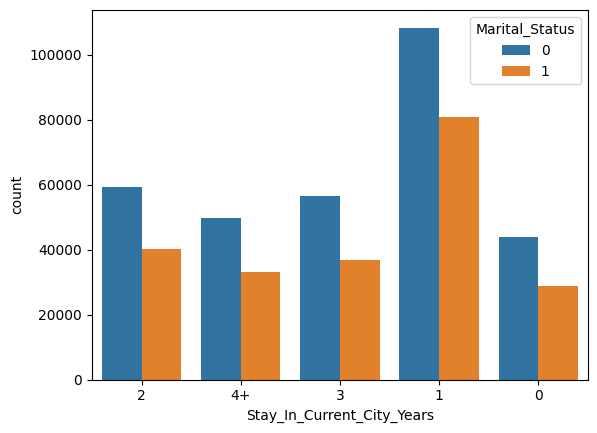

In [27]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

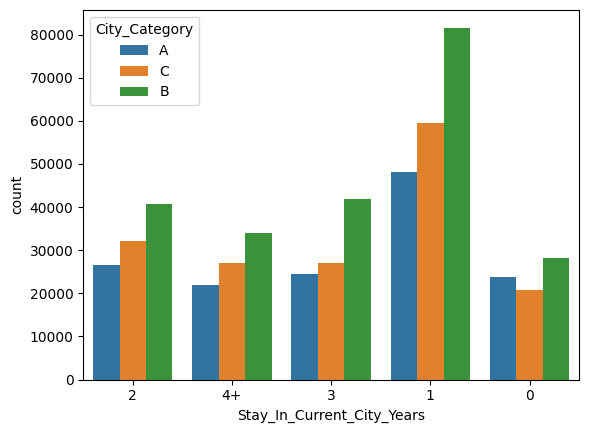

In [28]:
sns.countplot(x='Stay_In_Current_City_Years',hue='City_Category',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

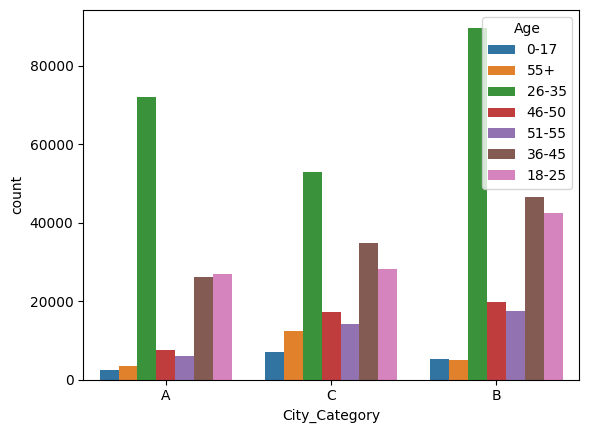

In [30]:
sns.countplot(x='City_Category',hue='Age',data=df)

### Form the multiple layer of analysis we see unmarried males ages 26-35 staying in city B whose stay in city is for 1 year tend to buy more on blackfriday sale

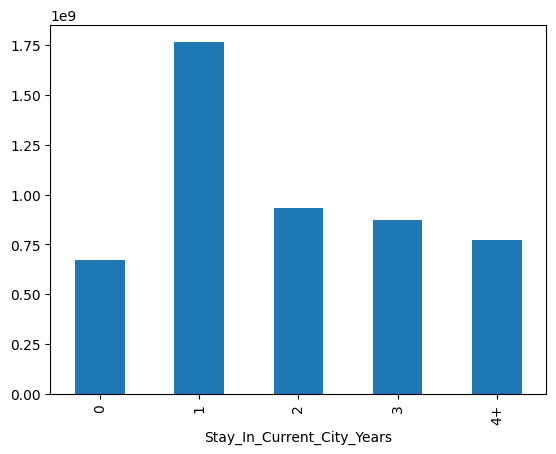

In [34]:
x=df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind='bar')


<Axes: xlabel='Occupation', ylabel='count'>

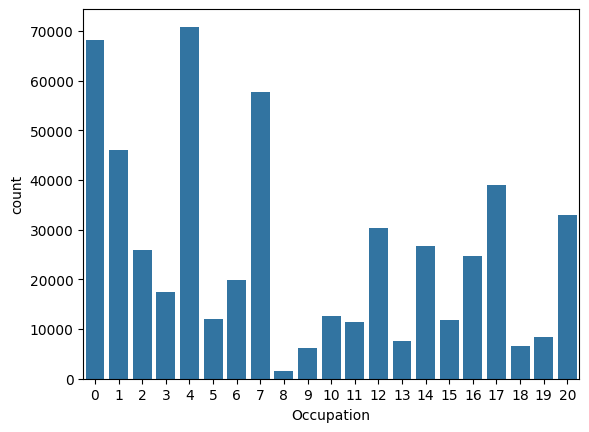

In [24]:
sns.countplot(x=df['Occupation'])

Axes(0.125,0.11;0.775x0.77)


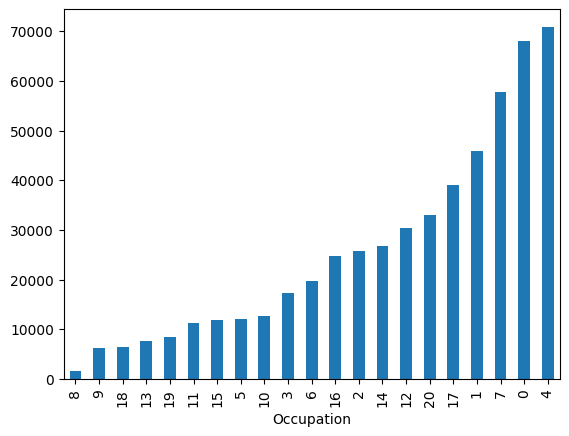

In [22]:
x=df.groupby("Occupation")
y=x["Purchase"].size().sort_values().plot(kind='bar')
print(y)

Axes(0.125,0.11;0.775x0.77)


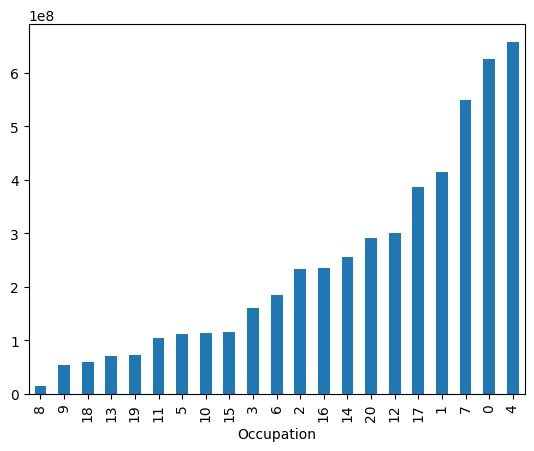

In [20]:
x=df.groupby("Occupation")
y=x.sum()['Purchase'].sort_values().plot(kind='bar')
print(y)

Axes(0.125,0.11;0.775x0.77)


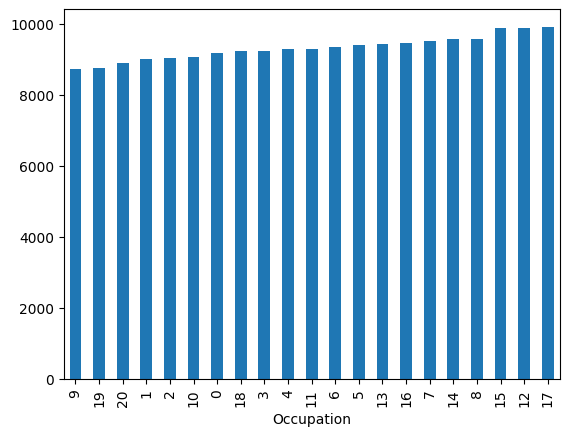

In [23]:
x=df.groupby("Occupation")
y=x["Purchase"].mean().sort_values().plot(kind='bar')
print(y)

## 15,16 and 17 are buying more expensive items     

<Axes: xlabel='Occupation', ylabel='count'>

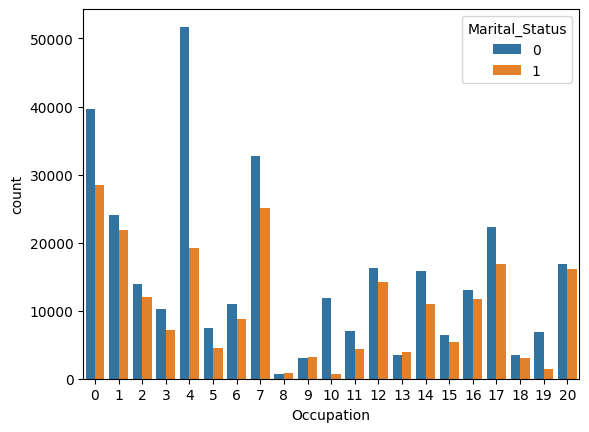

In [36]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

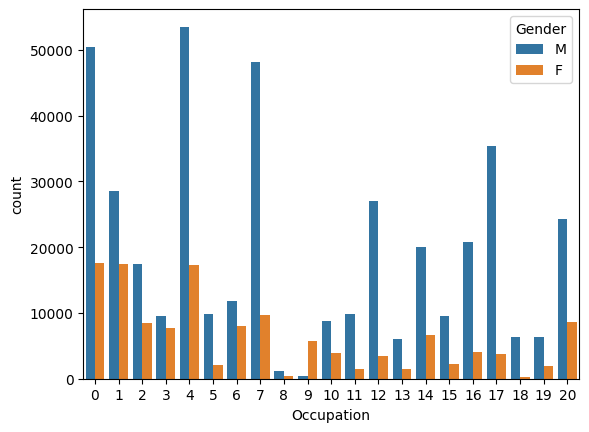

In [37]:
sns.countplot(x='Occupation',hue='Gender',data=df)

In [40]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<Axes: xlabel='Occupation'>

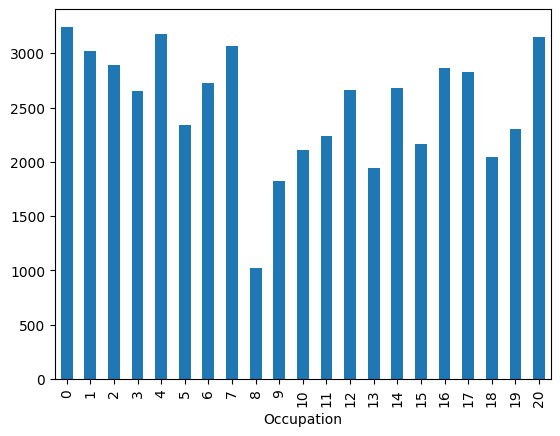

In [41]:
df.groupby('Occupation')['Product_ID'].nunique().plot(kind='bar')

<Axes: xlabel='Occupation'>

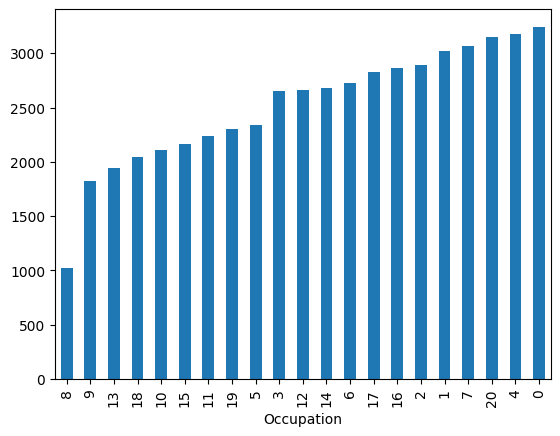

In [42]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

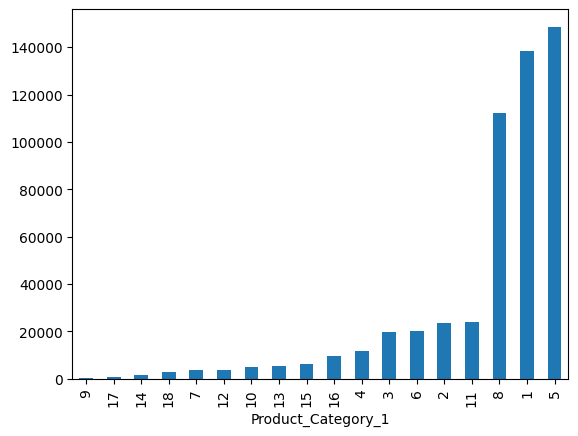

In [45]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

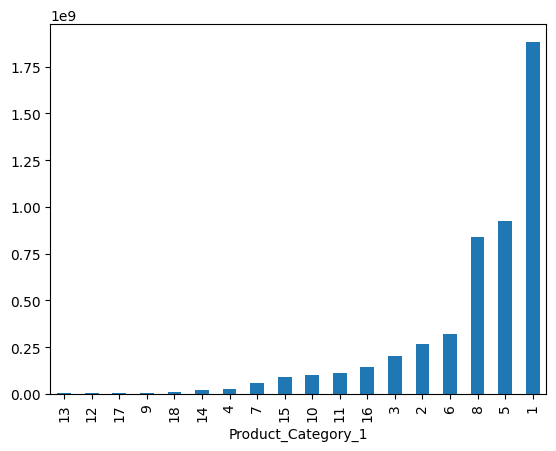

In [46]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

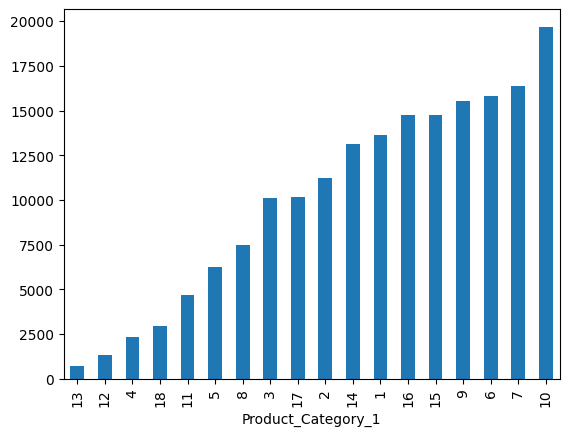

In [47]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

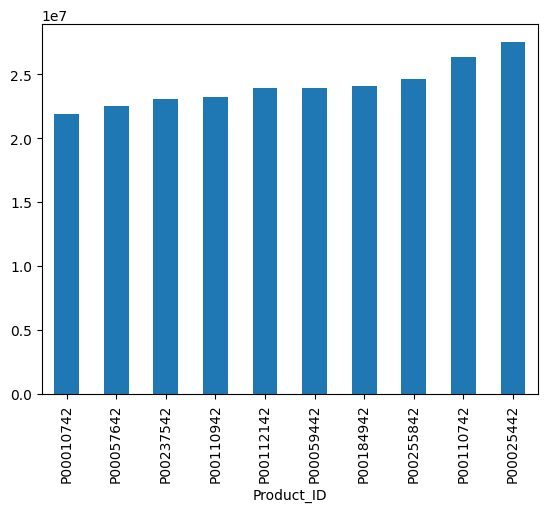

In [49]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

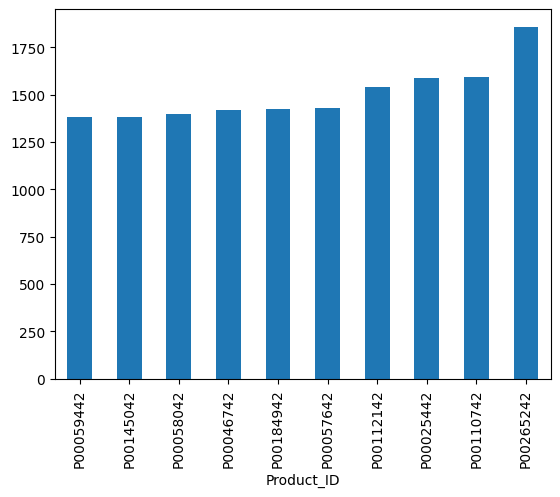

In [50]:
df.groupby('Product_ID')['Purchase'].size().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

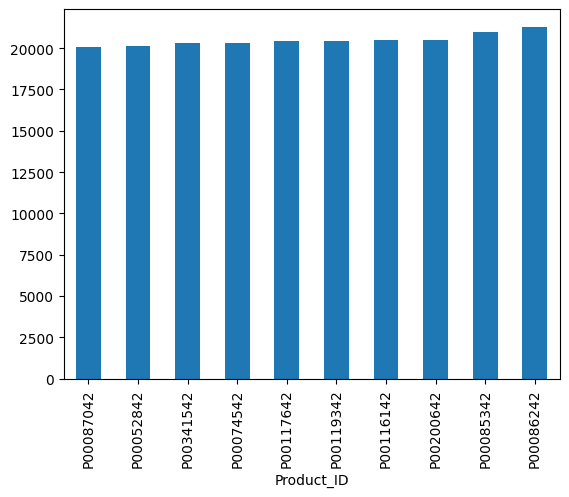

In [51]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind='bar')

## Gender and marital status

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
    
df['MaritalGender']=l

<Axes: xlabel='MaritalGender', ylabel='count'>

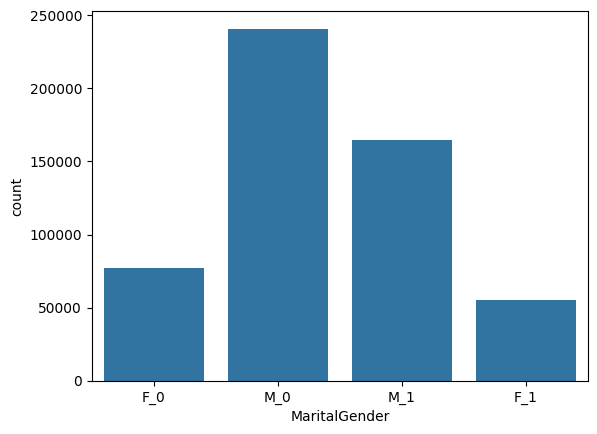

In [10]:
sns.countplot(x=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

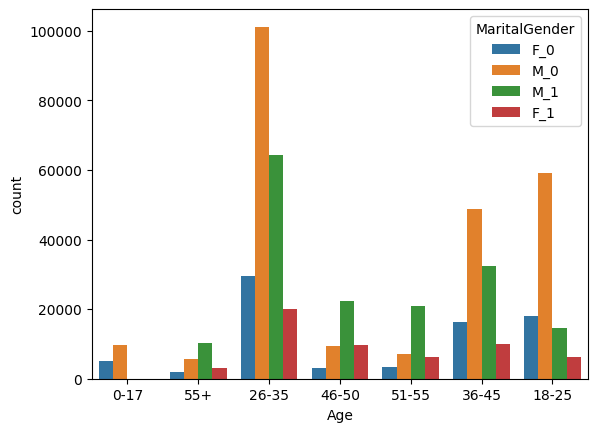

In [11]:
sns.countplot(x=df['Age'],hue=df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

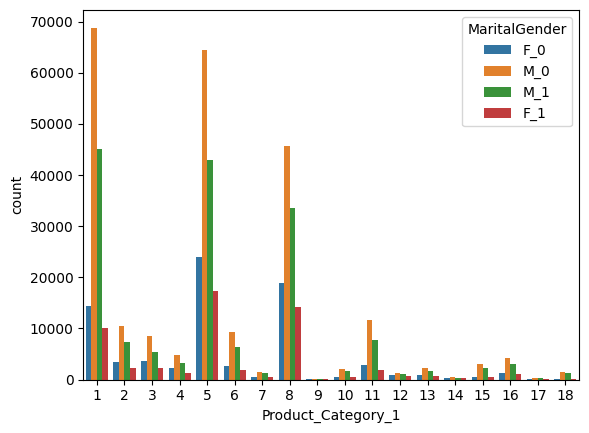

In [12]:
sns.countplot(x=df['Product_Category_1'],hue=df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

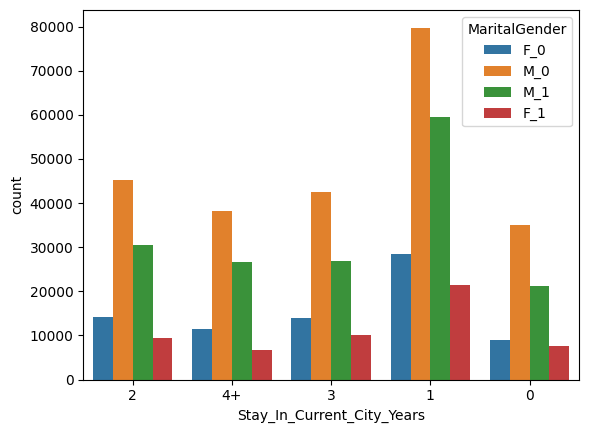

In [13]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['MaritalGender'])